<a href="https://colab.research.google.com/github/jeffheaton/app_deep_learning/blob/main/t81_558_class_07_3_deoldify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
**Module 7: Image Generative Models**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 7 Material

- Part 7.1 Introduction to Generative AI [[Video]](https://www.youtube.com/watch?v=2FbkbSnS8sg&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_1_img_generative.ipynb)
- Part 7.2 Generating Faces with StyleGAN3 [[Video]](https://www.youtube.com/watch?v=VcI2o1yEQa0&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_2_gan_intro.ipynb)
- **Part 7.3 GANS to Enhance Old Photographs** Deoldify [[Video]](https://www.youtube.com/watch?v=y7HvjfKsZ50&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_3_deoldify.ipynb)
- Part 7.4 Text to Images with StableDiffusion [[Video]](https://www.youtube.com/watch?v=gLj6-gJ-lR4&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_4_stable_diff.ipynb)
- Part 7.5 Finetuning with Dreambooth [[Video]](https://www.youtube.com/watch?v=G_FYFSzkB5Y&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_5_dream_booth.ipynb)

# Part 7.3: GANS to Enhance Old Photographs Deoldify

For the last two parts of this module, we will examine two applications of GANs. The first application is named [deoldify](https://deoldify.ai/), which uses a PyTorche-based GAN to transform old photographs into more modern-looking images. The complete [source code](https://github.com/jantic/DeOldify) to Deoldify is provided, along with several examples [notebooks](https://colab.research.google.com/github/jantic/DeOldify/blob/master/ImageColorizerColab.ipynb) upon which I based this part.

## Install Needed Software

We begin by cloning the deoldify repository.

In [1]:
# HIDE OUTPUT
!git clone https://github.com/jantic/DeOldify.git DeOldify
%cd DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 2606, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 2606 (delta 85), reused 207 (delta 70), pack-reused 2346
Receiving objects: 100% (2606/2606), 69.71 MiB | 13.20 MiB/s, done.
Resolving deltas: 100% (1168/1168), done.
/content/DeOldify


Install any additional Python packages needed.

In [3]:
# HIDE OUTPUT
!pip install -r requirements-colab.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.4/631.4 kB 46.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 35.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 89.9 MB/s eta 0:00:00
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654002 sha256=8ac9ce788dcabde9591400834ff489a98084dd3f4a55d113bc11f740216906b6
  Stored in directory: /root/.cache/pip/whee

Install the pretrained weights for deoldify.

In [4]:
# HIDE OUTPUT
!mkdir './models/'
CMD = "wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth"\
  " -O ./models/ColorizeArtistic_gen.pth"
!{CMD}

mkdir: cannot create directory ‘./models/’: File exists
--2023-08-30 14:36:03--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 169.150.236.98, 2400:52e0:1500::1031:1
Connecting to data.deepai.org (data.deepai.org)|169.150.236.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  4.99MB/s    in 50s     

2023-08-30 14:36:53 (4.89 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



## Initialize Torch Device

First, we must initialize a Torch device.  If we have a GPU available, we will detect it here.  I assume that you will run this code from Google CoLab, with a GPU.  It is possible to run this code from a local GPU; however, some modification will be necessary.

In [6]:
import sys

#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
  print('GPU not available.')
else:
  print('Using GPU.')

Using GPU.


We can now call the model. I will enhance an image from my childhood, probably taken in the late 1970s. The picture shows three miniature schnauzers. My childhood dog (Scooby) is on the left, followed by his mom and sister. Overall, a stunning improvement. However, the red in the fire engine riding toy is lost, and the red color of the picnic table where the three dogs were sitting.

In [7]:
# HIDE OUTPUT
import fastai
from deoldify.visualize import *
import warnings
from urllib.parse import urlparse
import os

warnings.filterwarnings("ignore", category=UserWarning,
          message=".*?Your .*? set is empty.*?")

URL = 'https://raw.githubusercontent.com/jeffheaton/'\
  't81_558_deep_learning/master/photos/scooby_family.jpg'

!wget {URL}

a = urlparse(URL)
before_file = os.path.basename(a.path)

RENDER_FACTOR = 35
WATERMARK = False

colorizer = get_image_colorizer(artistic=True)

after_image = colorizer.get_transformed_image(
    before_file, render_factor=RENDER_FACTOR,
    watermarked=WATERMARK)






INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.
--2023-08-30 14:38:41--  https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/photos/scooby_family.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43719 (43K) [image/jpeg]
Saving to: ‘scooby_family.jpg’

scooby_family.jpg   100%[===================>]  42.69K  --.-KB/s    in 0.002s  

2023-08-30 14:38:41 (27.1 MB/s) - ‘scooby_family.jpg’ saved [43719/43719]



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can als

You can see the starting image here.

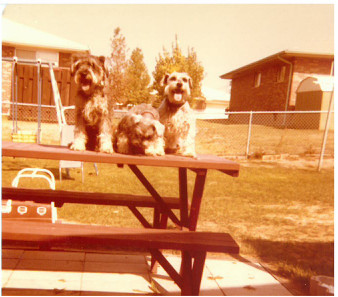

In [8]:
from IPython import display
display.Image(URL)

You can see the deoldify version here. Please note that these two images will look similar in a black and white book. To see it in color, visit this [link](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_4_deoldify.ipynb).

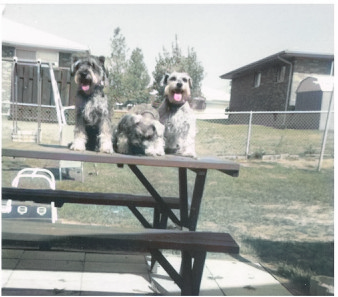

In [9]:
after_image